In [11]:
import sys
sys.path.append('../')
import os
import glob
import pandas as pd
import argparse
import configparser
import numpy as np
import torch
import matplotlib
matplotlib.use('tkagg')
%matplotlib inline
import matplotlib.pyplot as plt
from collections import OrderedDict

from model import *
from lib.preprocessing import *
from lib.dataloading import *
from lib.loss_functions import *
from lib.evaluation import *
from torchvision import transforms
import torchvision.models as models
from torch import optim, nn

In [2]:
def tensor2numpy(tensor):
    np_tensor = tensor.detach().numpy()    
    return np.rollaxis(np_tensor, 1 , 4)

def min_max(img):
    min = np.min(img)
    max = np.max(img)
    return (img - min)/(max - min)

In [3]:
generator =  CENet()

In [4]:
generator.load_state_dict(torch.load('../results/base-padding-dcm/epoch33.pth'))

<All keys matched successfully>

In [5]:
transform = get_transformer_norm()
dataset = SSIDataset(img_file = '../../../Data/SSI/ssi.csv', transform= transform['val'], inpaint = True)
dataloader = torch.utils.data.DataLoader(dataset, batch_size = 2)
dataiter = iter(dataloader)

In [6]:
from torchvision.utils import make_grid

In [43]:
img, center, dcm = next(dataiter)

In [44]:
img_np = tensor2numpy(img)
img_np = min_max(img_np)

In [45]:
img_np = tensor2numpy(img)
img_np = min_max(img_np)

center_np = tensor2numpy(center)
center_np = min_max(center_np)

In [46]:
pred_centers = generator(img)  
pred_center_np = tensor2numpy(pred_centers)
pred_center_np = min_max(pred_center_np)

In [47]:
ori_img = img_np[0].copy()
pred_img = img_np[0].copy()
h,w = ori_img.shape[0], ori_img.shape[1]

ori_img[h//4:(h*3//4), w//4:(w*3//4),:] = center_np[0]
pred_img[h//4:(h*3//4), w//4:(w*3//4),:] = pred_center_np[0]

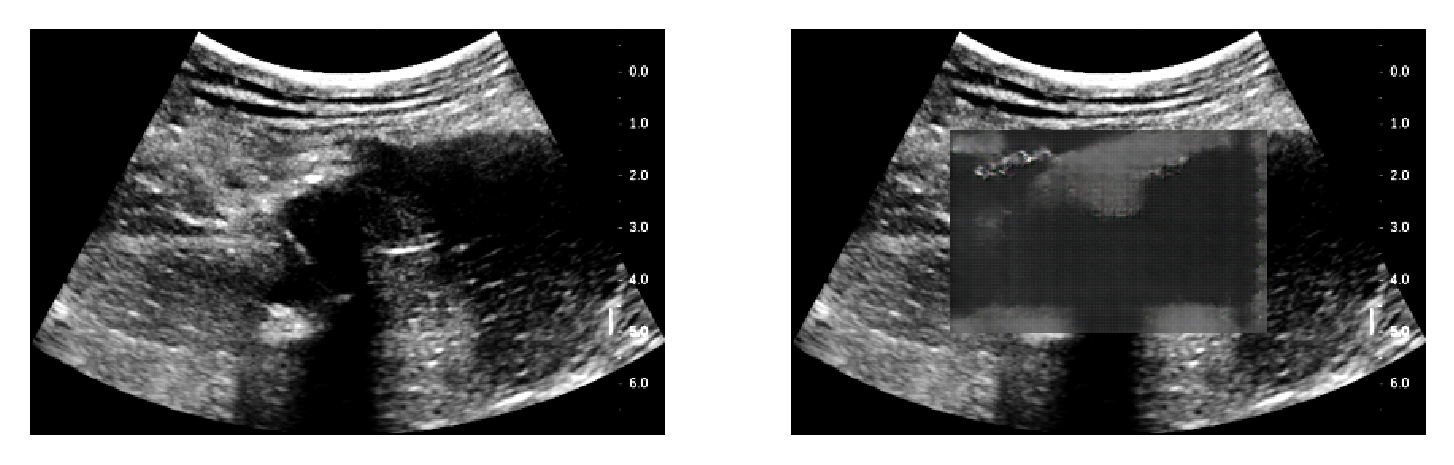

In [48]:
fig, axes = plt.subplots(ncols=2, dpi = 300)
axes[0].imshow(ori_img)
axes[1].imshow(pred_img)
[ax.set_axis_off() for ax in axes]
plt.show()